In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_local(array, start:int, end:int):
    if (end > len(array)):
        end = -1
        start -= end - len(array)
    new_array = np.asarray(array[start:end])
    idx_min = new_array.argmin()
    idx_max = new_array.argmax()
    return [new_array[idx_min], new_array[idx_max]]

In [2]:
!pwd

/home/yiwen/mice_physiology/micenew/rebuild/group_average


In [3]:
path = "./"
metafile = "./mice"
metafile2 = "../mice"

control_mouse = "53"
mutant_mouse = "52M"
hyper_mouse = "51M"

In [4]:
metadata = pd.read_csv(metafile, sep=' ', names=['mouse', 'type', 'offset'])
metadata2 = pd.read_csv(metafile2, sep=' ', names=['path', 'mouse', 'type', 'batch', 'start', 'end', 'n', 'm'])
metadata = metadata.set_index('mouse')
metadata2 = metadata2.set_index('mouse')

In [5]:
metadata.T

mouse,12Otx2,56Otx2,73Otx2,84Otx2,51M,52M,54M,56M,58M,68M,...,64M,82WT,83WT,53,55,57,61,63,65,67
type,mutant,hyper,hyper,mutant,hyper,mutant,mutant,mutant,mutant,hyper,...,hyper,control,control,control,control,control,control,control,control,control
offset,0,0,0,0,46,53,31,54,45,80,...,80,0,0,45,46,45,89,86,85,90


In [6]:
metadata2.T

mouse,12Otx2,56Otx2,73Otx2,84Otx2,51M,52M,54M,56M,58M,68M,...,64M,82WT,83WT,53,55,57,61,63,65,67
path,../../data,../../data,../../data,../../data,../../data,../../data,../../data,../../data,../../data,../../data,...,../../data,../../data,../../data,../../data,../../data,../../data,../../data,../../data,../../data,../../data
type,mutant,mutant,mutant,mutant,mutant,mutant,mutant,mutant,mutant,mutant,...,mutant,mutnt,mutnt,mutnt,mutnt,mutnt,mtant,mtant,mtant,mtant
batch,3,3,3,3,5,5,5,5,5,6,...,6,3,3,5,5,5,6,6,6,6
start,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,1,1
end,36,36,36,36,36,36,36,36,36,32,...,32,36,36,36,36,36,32,32,32,32
n,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
m,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
def draw_circadian_overview():
    the_choosen_len = 180

    control_data = np.genfromtxt(path+control_mouse+"_circadian.txt")
    mutant_data = np.genfromtxt(path+mutant_mouse+"_circadian.txt")
    hyper_data = np.genfromtxt(path+hyper_mouse+"_circadian.txt")

    x = np.arange(the_choosen_len)
    x = x / 6

    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(3,1, hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylabel('Circadian Rhythm')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
    control_plot = fig.add_subplot(gs[0,0])
    mutant_plot = fig.add_subplot(gs[1,0], sharex=control_plot)
    hyper_plot = fig.add_subplot(gs[2,0], sharex=control_plot)

    mrhythm = max(max(mutant_data[:,1]), max(control_data[:,1]), max(hyper_data[:,1]))
    srhythm = min(min(mutant_data[:,1]), min(control_data[:,1]), min(hyper_data[:,1]))

    # control_plot.set_ylim(srhythm, mrhythm)
    handle1, = control_plot.plot(x, control_data[:the_choosen_len,1], 'g', label="control")
    control_plot.tick_params(axis='both', direction='in')
    # mutant_plot.set_ylim(srhythm, mrhythm)
    handle2, = mutant_plot.plot(x, mutant_data[:the_choosen_len,1], 'b', label="mutant - normal activity")
    # mutant_plot.tick_params(axis='both', direction='in')
    # hyper_plot.set_ylim(srhythm, mrhythm)
    handle3, = hyper_plot.plot(x, hyper_data[:the_choosen_len,1], 'r', label="mutant - hyper activity")
    hyper_plot.tick_params(axis='both', direction='in')
    hyper_plot.set_xlabel("day")
    control_plot.legend(handles=[handle1, handle2, handle3], loc='upper right')

    # fig.legend(loc='upper right')
    figname = 'circadian_rhythm_overview.pdf'
    fig.savefig(figname)
    print("figsave: ", figname)

def plot_all():
    draw_circadian_overview()
    draw_activity_overview()
    draw_probability_density()
    draw_power_spec_waveform()


In [ ]:
def draw_circadian(axes, mouse):
    control_data = np.genfromtxt(path+control_mouse+"_circadian.txt")

In [8]:
def draw_activity_overview():
    the_choosen_len = 2790

    control_data = np.genfromtxt(path+control_mouse+"_activity_reduce.txt")
    mutant_data = np.genfromtxt(path+mutant_mouse+"_activity_reduce.txt")
    hyper_data = np.genfromtxt(path+hyper_mouse+"_activity_reduce.txt")

    x = np.arange(the_choosen_len)
    x = x / 4 / 24

    fig = plt.figure(figsize=(8, 6))

    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylabel('Activity')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    gs = fig.add_gridspec(3,1, hspace=0.0, wspace = 0.01)
    control_plot = fig.add_subplot(gs[0])
    mutant_plot = fig.add_subplot(gs[1], sharex=control_plot)
    hyper_plot = fig.add_subplot(gs[2], sharex=control_plot)

    # mrhythm = max(max(mutant_data[:]), max(control_data[:]), max(hyper_data[:]))
    # srhythm = min(min(mutant_data[:]), min(control_data[:]), min(hyper_data[:]))

    # control_plot.set_ylim(srhythm, mrhythm)
    handle1, = control_plot.plot(x, control_data[:the_choosen_len], 'g', label="control")
    control_plot.tick_params(axis='both', direction='in')
    # mutant_plot.set_ylim(srhythm, mrhythm)
    handle2, = mutant_plot.plot(x, mutant_data[:the_choosen_len], 'b', label="mutant - normal activity")
    mutant_plot.tick_params(axis='both', direction='in')
    # hyper_plot.set_ylim(srhythm, mrhythm)
    handle3, = hyper_plot.plot(x, hyper_data[:the_choosen_len], 'r', label="mutant - hyper activity")
    hyper_plot.tick_params(axis='both', direction='in')
    hyper_plot.set_xlabel("day")

    control_plot.legend(handles=[handle1, handle2, handle3], loc='upper right')

    figname = 'activity_overview.pdf'
    fig.savefig(figname)
    print("figsave: ", figname)

savefig:  spectrum_waveform_individual.pdf
savefig:  spectrum_waveform_group.pdf


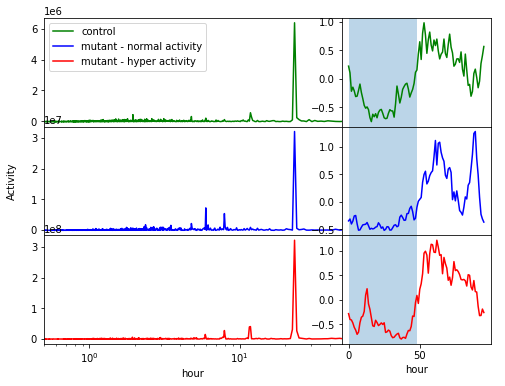

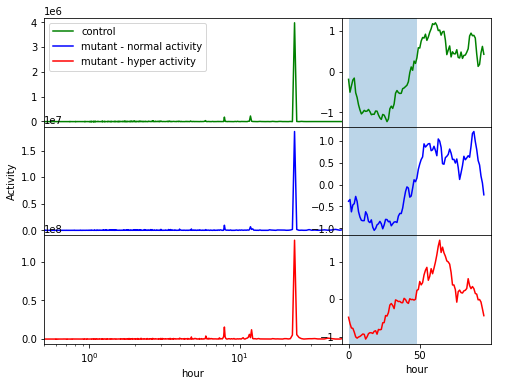

In [9]:
def draw_power_spec_waveform(group=False):
    the_choosen_len = 2790

    if group == True:
        control_data = np.genfromtxt(path+"control_group_average_activiry.txt")
        mutant_data = np.genfromtxt(path+"mutant_group_average_activiry.txt")
        hyper_data = np.genfromtxt(path+"mutant_hyper_group_average_activiry.txt")
    else:
        control_data = np.genfromtxt(path+control_mouse+"_activity_reduce.txt")
        mutant_data = np.genfromtxt(path+mutant_mouse+"_activity_reduce.txt")
        hyper_data = np.genfromtxt(path+hyper_mouse+"_activity_reduce.txt")

    x = np.arange(the_choosen_len)
    x = x / 4 / 24

    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(3,3, hspace=0.0, wspace = 0.0)
    ax = fig.add_subplot(111)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_ylabel('Activity')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    control_plot = fig.add_subplot(gs[0,0:2])
    mutant_plot = fig.add_subplot(gs[1,0:2], sharex=control_plot)
    hyper_plot = fig.add_subplot(gs[2,0:2], sharex=control_plot)

    data = np.square(np.abs(np.fft.rfft(control_data-np.mean(control_data))))
    data = data - np.mean(data)
    # data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x
    control_plot.set_xscale('log')
    # control_plot.set_yscale('log')
    handle1, = control_plot.plot(x, data, 'g', label='control')
    control_plot.set_xlim(np.min(x),48)

    data = np.square(np.abs(np.fft.rfft(mutant_data-np.mean(mutant_data))))
    data = data - np.mean(data)
    # data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x
    mutant_plot.set_xscale('log')
    # mutant_plot.set_yscale('log')
    handle2, = mutant_plot.plot(x, data, 'b', label='mutant - normal activity')
    mutant_plot.set_xlim(np.min(x),48)

    data = np.square(np.abs(np.fft.rfft(hyper_data-np.mean(hyper_data))))
    data = data - np.mean(data)
    # data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x
    hyper_plot.set_xscale('log')
    # hyper_plot.set_yscale('log')
    handle3, = hyper_plot.plot(x, data, 'r', label='mutant - hyper activity')
    hyper_plot.set_xlim(np.min(x),48)

    control_plot.legend(handles=[handle1, handle2, handle3], loc='best')

    # Draw waveform
    control_waveform_plot = fig.add_subplot(gs[0,2])
    mutant_waveform_plot = fig.add_subplot(gs[1,2])
    hyper_waveform_plot = fig.add_subplot(gs[2,2])

    x = np.arange(96)
    x = x / 4

    length = len(control_data) // 96 * 96
    data = np.array(control_data[:length])
    days = length // 96
    data = data[:length]
    data = data - data.mean()
    data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    offset = 7
    data = np.concatenate([average[offset:], average[:offset]])
    control_waveform_plot.plot(data, 'g')
    control_waveform_plot.axvspan(0,48, alpha=0.3)

    length = len(mutant_data) // 96 * 96
    data = np.array(mutant_data[:length])
    days = length // 96
    data = data[:length]
    data = data - data.mean()
    data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    offset = 10
    data = np.concatenate([average[offset:], average[:offset]])
    mutant_waveform_plot.plot(data, 'b')
    mutant_waveform_plot.axvspan(0,48, alpha=0.3)

    length = len(hyper_data) // 96 * 96
    data = np.array(hyper_data[:length])
    days = length // 96
    data = data[:length]
    data = data - data.mean()
    data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    if group:
        offset = 5
    else:
        offset = 77
    data = np.concatenate([average[offset:], average[:offset]])
    hyper_waveform_plot.plot(data, 'r')
    hyper_waveform_plot.axvspan(0,48, alpha=0.3)

    hyper_plot.set_xlabel('hour')
    hyper_waveform_plot.set_xlabel('hour')

    figname = "spectrum_waveform_{}.pdf".format("group" if group == True else "individual")
    fig.savefig(figname)
    print ("savefig: ", figname)
draw_power_spec_waveform(group=False)
draw_power_spec_waveform(group=True)

0 12Otx2
1 56Otx2
2 73Otx2
3 84Otx2
4 51M
5 52M
6 54M
7 56M
8 58M
9 68M
10 62M
11 64M
12 82WT
13 83WT
14 53
15 55
16 57
17 61
18 63
19 65
20 67


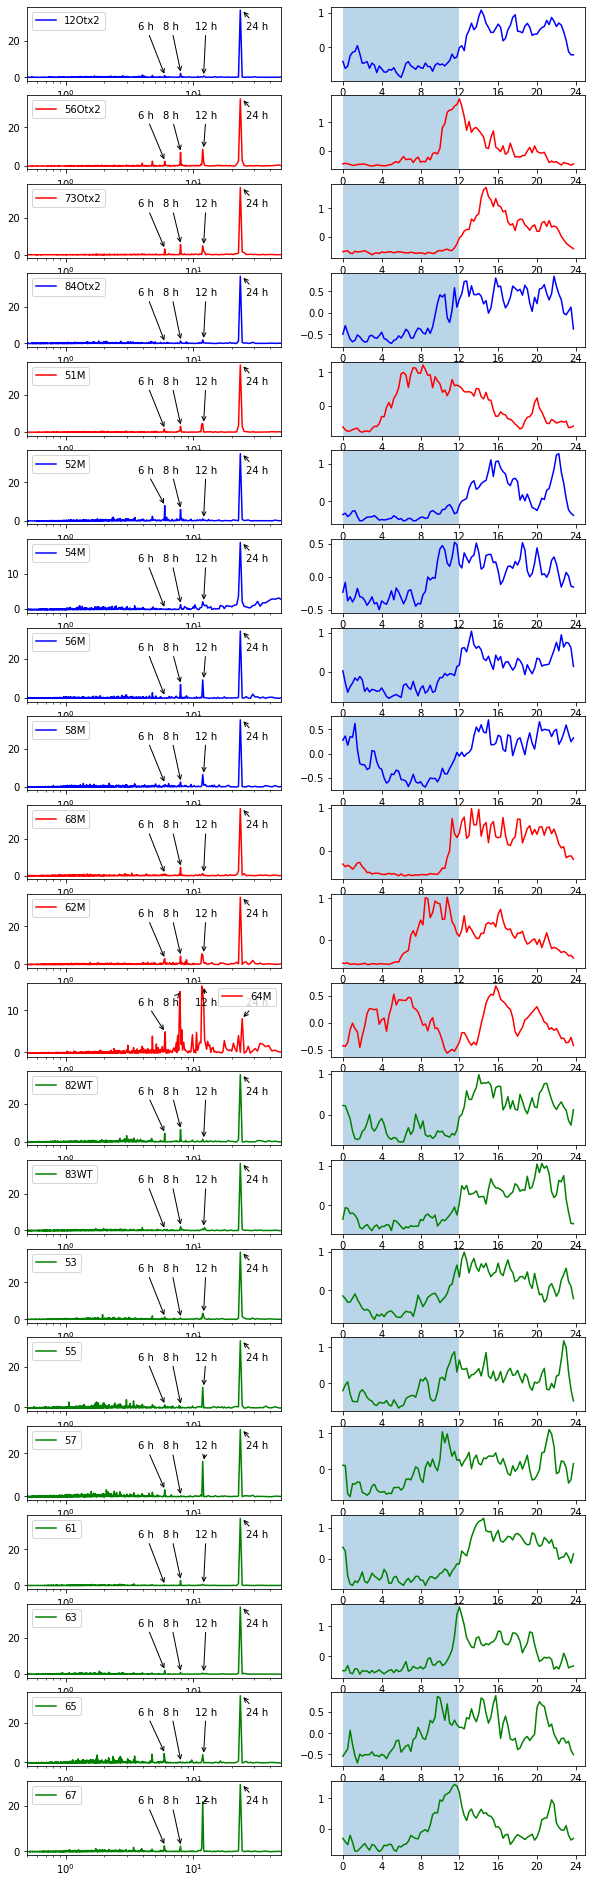

In [10]:

the_choosen_len = 2790

fignum = len(metadata.index)

fig, axes = plt.subplots(fignum, 2, figsize=(10,34))

for i in range(fignum):
    oridata = np.genfromtxt(path+metadata.index[i]+"_activity_reduce.txt")

    if (metadata.loc[metadata.index[i], 'type'] == 'control'):
        color = 'g'
    elif (metadata.loc[metadata.index[i], 'type'] == 'mutant'):
        color = 'b'
    else:
        color = 'r'
        

    data = np.square(np.abs(np.fft.rfft(oridata-np.mean(oridata))))
    data = data - np.mean(data)
    
    data = data / np.std(data)
    x = np.arange(len(data))
    x = x + 1
    x = the_choosen_len/ 4 / x

    axes[i][0].plot(x, data, color, label=metadata.index[i])
    axes[i][0].set_xscale('log')
    # axes[i][0].set_yscale('log')
    axes[i][0].legend(loc='best')
    axes[i][0].set_xlim(np.min(x),48)

    idx = np.where(x == find_nearest(x, 24))[0][0]
    axes[i][0].annotate('24 h',
            xy=(24, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.95, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')
    idx = np.where(x == find_nearest(x, 12))[0][0]
    axes[i][0].annotate('12 h',
            xy=(12, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.75, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')
    idx = np.where(x == find_nearest(x, 8))[0][0]
    axes[i][0].annotate('8 h',
            xy=(8, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.6, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')
    idx = np.where(x == find_nearest(x, 6))[0][0]
    axes[i][0].annotate('6 h',
            xy=(6, find_local(data, idx - 10, idx + 10)[1]), xycoords='data',
            xytext=(0.5, 0.8), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='right', verticalalignment='top')

    length = len(oridata) // 96 * 96
    data = np.array(oridata[:length])
    days = length // 96
    data = data[:length]
    data = data - data.mean()
    data = data / data.std()
    average = data.reshape(days, 96).mean(axis=0)
    offset = 10
    data = np.concatenate([average[offset:], average[:offset]])
    x = np.arange(0, 24, 24/len(data))
    xticks = np.arange(0, 24+0.001, 4)
    axes[i][1].plot(x, data, color)
    axes[i][1].set_xticks(xticks)
    axes[i][1].axvspan(0,12, alpha=0.3)
    print (i, metadata.index[i]) 
fig.savefig("spectrurm_waveform_all.pdf")

In [61]:
x[np.where(x == find_nearest(x, 12))]

array([12.])

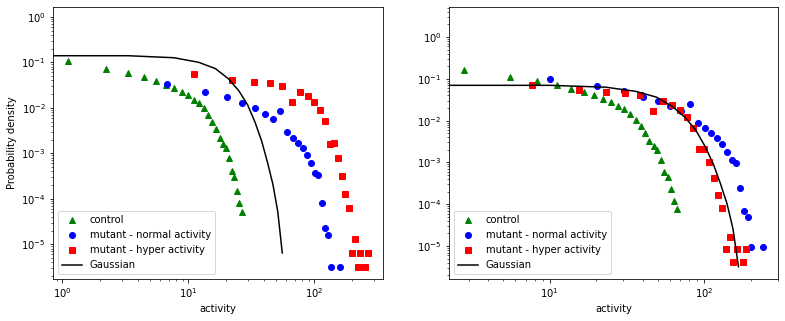

In [9]:

def draw_probability_density(N : int=4):
    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(control_mouse)
    control_data = np.genfromtxt(fullpath)[:,1]
    control_data = np.convolve(control_data, np.ones(N)/N, mode='valid')


    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(mutant_mouse)
    mutant_data = np.genfromtxt(fullpath)[:,1]
    control_data = np.convolve(control_data, np.ones(N)/N, mode='valid')

    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(hyper_mouse)
    hyper_data = np.genfromtxt(fullpath)[:,1]
    

    mu = np.mean(mutant_data)
    sd = np.std(mutant_data)
    surrogate = np.random.normal(mu, sd, len(mutant_data))


    fig, axes = plt.subplots(1,2,figsize=(13,5))
    # fig.tight_layout()

    hist, bin_edge = np.histogram(control_data, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'g^', label='control')
    hist *= 1.5
    bin_edge *= 2.5
    axes[1].plot(bin_edge[:-1], hist, 'g^', label='control')
    hist, bin_edge = np.histogram(mutant_data, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'bo', label='mutant - normal activity')
    hist *= 3
    bin_edge *= 1.5
    axes[1].plot(bin_edge[:-1], hist, 'bo', label='mutant - normal activity')
    hist, bin_edge = np.histogram(hyper_data, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'rs', label='mutant - hyper activity')
    hist *= 1.3
    bin_edge *= 0.7
    axes[1].plot(bin_edge[:-1], hist, 'rs', label='mutant - hyper activity')
    hist, bin_edge = np.histogram(surrogate, bins=25)
    hist = hist / np.sum(hist)
    axes[0].plot(bin_edge[:-1], hist, 'black',label='Gaussian')
    hist *= 0.5
    bin_edge *= 3
    axes[1].plot(bin_edge[:-1], hist, 'black',label='Gaussian')

    axes[0].set_yscale('log')
    axes[0].set_xscale('log')
    axes[0].set_xlabel('activity')
    axes[0].set_ylabel('Probability density')
    axes[0].legend(loc='lower left')
    axes[1].set_yscale('log')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('activity')
    # axes[1].set_ylabel('Probability density')
    axes[1].legend(loc='lower left')

    fig.savefig("activity_distribution_density.pdf")
draw_probability_density(30)

figsave:  circadian_rhythm_overview.pdf
figsave:  activity_overview.pdf
savefig:  spectrum_waveform_individual.pdf


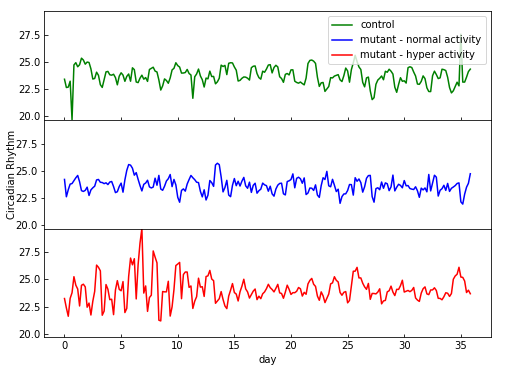

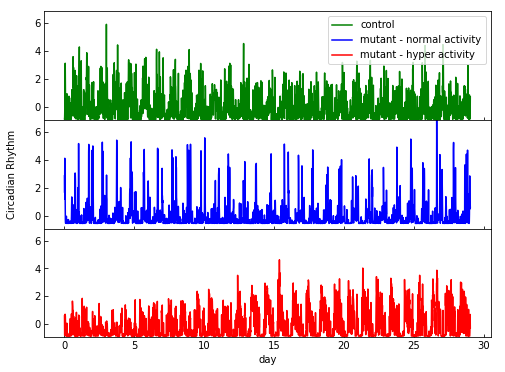

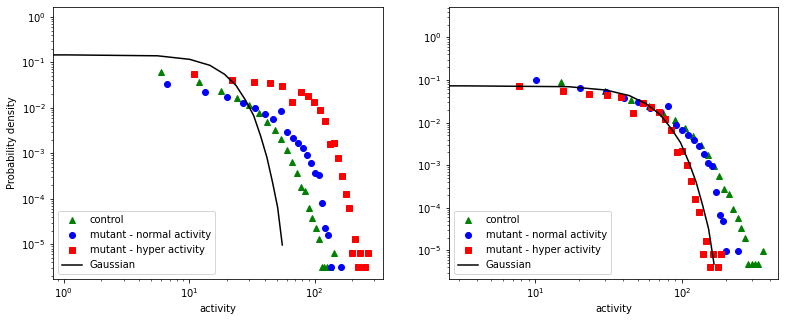

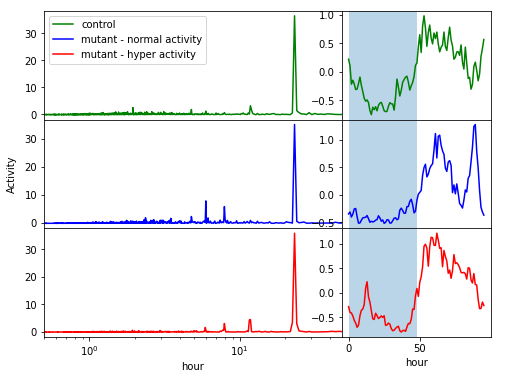

In [15]:
plot_all()

figsave:  circadian_rhythm_overview.pdf


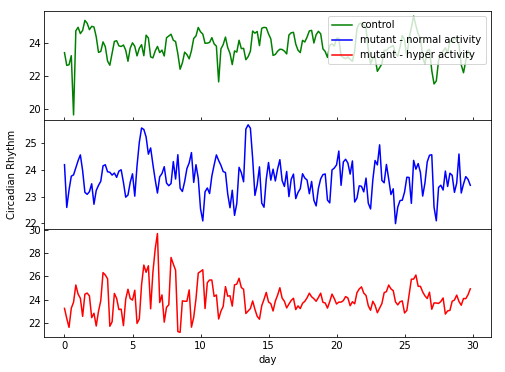

In [136]:
draw_circadian_overview()

figsave:  activity_overview.pdf


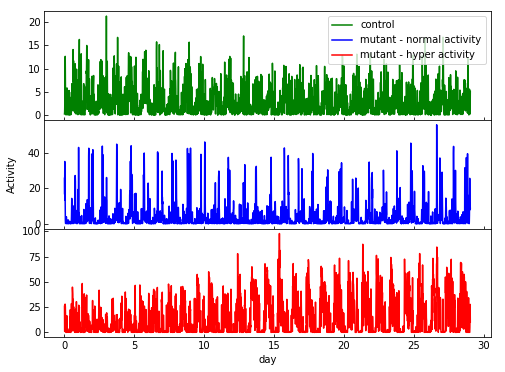

In [143]:
draw_activity_overview()

In [9]:
N = 90

data_dict = {}
smooth_data_dict = {}

for i in metadata2.index:
    fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(i)
    data_dict[i] = np.genfromtxt(fullpath)[:,1]
    smooth_data_dict[i] = np.convolve(data_dict[i], np.ones(N)/N, mode='valid')
    print (fullpath)

../../causality/selected_data/12Otx2.Activity.txt
../../causality/selected_data/56Otx2.Activity.txt
../../causality/selected_data/73Otx2.Activity.txt
../../causality/selected_data/84Otx2.Activity.txt
../../causality/selected_data/51M.Activity.txt
../../causality/selected_data/52M.Activity.txt
../../causality/selected_data/54M.Activity.txt
../../causality/selected_data/56M.Activity.txt
../../causality/selected_data/58M.Activity.txt
../../causality/selected_data/68M.Activity.txt
../../causality/selected_data/62M.Activity.txt
../../causality/selected_data/64M.Activity.txt
../../causality/selected_data/82WT.Activity.txt
../../causality/selected_data/83WT.Activity.txt
../../causality/selected_data/53.Activity.txt
../../causality/selected_data/55.Activity.txt
../../causality/selected_data/57.Activity.txt
../../causality/selected_data/61.Activity.txt
../../causality/selected_data/63.Activity.txt
../../causality/selected_data/65.Activity.txt
../../causality/selected_data/67.Activity.txt


In [11]:
mu = np.mean(data_dict['52M'])
sd = np.std(data_dict['52M'])
surrogate = np.random.normal(mu, sd, len(data_dict['52M']))

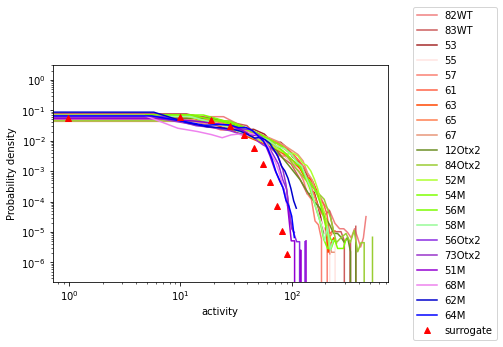

In [28]:
N=5
## Control

name = '82WT'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1
bin_edge *= 1.5
plt.plot(bin_edge[:-1], hist, 'lightcoral', label=name)

name = '83WT'
hist, bin_edge = np.histogram(data_dict[name], bins=20)
hist = hist / np.sum(hist)
hist *= 1.6
bin_edge *= 1.4
plt.plot(bin_edge[:-1], hist, 'indianred', label=name)

name = '53'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.9
bin_edge *= 3.5
plt.plot(bin_edge[:-1], hist, 'brown', label=name)

name = '55'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 3.7
plt.plot(bin_edge[:-1], hist, 'mistyrose', label=name)

name = '57'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 3.7
plt.plot(bin_edge[:-1], hist, 'salmon', label=name)

name = '61'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5.5
plt.plot(bin_edge[:-1], hist, 'tomato', label=name)

name = '63'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5.8
plt.plot(bin_edge[:-1], hist, 'orangered', label=name)

name = '65'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5
plt.plot(bin_edge[:-1], hist, 'coral', label=name)

name = '67'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.6
bin_edge *= 5
plt.plot(bin_edge[:-1], hist, 'darksalmon', label=name)

## Mutant
name = '12Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.7
bin_edge *= 1.6
plt.plot(bin_edge[:-1], hist, 'olivedrab', label=name)

name = '84Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.7
bin_edge *= 1.4
plt.plot(bin_edge[:-1], hist, 'yellowgreen', label=name)

name = '52M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.9
bin_edge *= 2
plt.plot(bin_edge[:-1], hist, 'greenyellow', label=name)

name = '54M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.9
bin_edge *= 1.7
plt.plot(bin_edge[:-1], hist, 'chartreuse', label=name)

name = '56M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.8
bin_edge *= 2.5
plt.plot(bin_edge[:-1], hist, 'lawngreen', label=name)

name = '58M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.8
bin_edge *= 1.8
plt.plot(bin_edge[:-1], hist, 'palegreen', label=name)

# Hyper
name = '56Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1.5
bin_edge *= 0.6
plt.plot(bin_edge[:-1], hist, 'blueviolet', label=name)

name = '73Otx2'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1
bin_edge *= 0.35
plt.plot(bin_edge[:-1], hist, 'darkorchid', label=name)

name = '51M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.8
bin_edge *= 0.55
plt.plot(bin_edge[:-1], hist, 'darkviolet', label=name)

name = '68M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1.4
bin_edge *= 0.7
plt.plot(bin_edge[:-1], hist, 'violet', label=name)

name = '62M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 1.4
bin_edge *= 0.7
plt.plot(bin_edge[:-1], hist, 'mediumblue', label=name)

name = '64M'
data = np.convolve(data_dict[name], np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(data, bins=20)
hist = hist / np.sum(hist)
hist *= 0.92
bin_edge *= 0.6
plt.plot(bin_edge[:-1], hist, 'blue', label=name)

## Surrogate
data = np.convolve(surrogate, np.ones(N)/N, mode='valid')
hist, bin_edge = np.histogram(surrogate, bins=20)
hist = hist / np.sum(hist)
hist *= 0.3
bin_edge *= 2.5
plt.plot(bin_edge[:-1], hist, 'r^', label='surrogate')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center')
plt.savefig('distribution_all.pdf', bbox_inches='tight')


In [133]:
N=5

fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(control_mouse)
control_data = np.genfromtxt(fullpath)[:,1]
control_data = np.convolve(control_data, np.ones(N)/N, mode='valid')

fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(mutant_mouse)
mutant_data = np.genfromtxt(fullpath)[:,1]
mutant_data = np.convolve(mutant_data, np.ones(N)/N, mode='valid')

fullpath = '../../causality/selected_data' + '/{}.Activity.txt'.format(hyper_mouse)
hyper_data = np.genfromtxt(fullpath)[:,1]
hyper_data = np.convolve(hyper_data, np.ones(N)/N, mode='valid')

mu = np.mean(hyper_data)
sd = np.std(hyper_data)
surrogate = np.random.normal(mu, sd, len(mutant_data))
surrogate = np.convolve(surrogate, np.ones(N)/N, mode='valid')



In [8]:
np.unique(data_dict['12Otx2'])

array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
        66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
       132., 138., 144., 150., 156., 162., 168., 174., 180., 186., 192.,
       198., 204., 210., 216., 222., 228., 234., 240., 246., 252., 258.,
       264., 270., 276., 282., 288., 306., 324., 342.])

In [11]:
print("hyper ")
temp_data = []
for i in metadata.index[metadata.type == 'hyper']:
    temp_data.append(smooth_data_dict[i])
    print (i , end=" ")
hyper_conca = np.concatenate(temp_data)
print(" len: ", len(temp_data))

print("mutant")
temp_data = []

for i in metadata.index[metadata.type == 'mutant']:
    temp_data.append(smooth_data_dict[i])
    print (i , end=" ")
mutant_conca = np.concatenate(temp_data)
print(" len: ", len(temp_data))

print("control")
temp_data = []

for i in metadata.index[metadata.type == 'control']:
    temp_data.append(smooth_data_dict[i])
    print (i , end=" ")
control_conca = np.concatenate(temp_data)
print(" len: ", len(temp_data))

hyper 
56Otx2 73Otx2 51M 68M 62M 64M  len:  6
mutant
12Otx2 84Otx2 52M 54M 56M 58M  len:  6
control
82WT 83WT 53 55 57 61 63 65 67  len:  9


In [12]:
mu = np.mean(mutant_conca)
sd = np.std(mutant_conca)

surrogate = np.random.normal(mu, sd, len(mutant_conca))

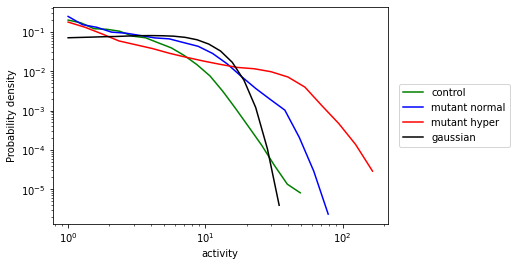

In [13]:

linear_bin_num = 20

bin_num = 20
bin_min = 0

# bins = np.arange(-1, 1, linear_bin_num)

data = control_conca * 1.0
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist = hist / np.sum(hist)
hist *= 1.0
plt.plot(bin_edge[:-1], hist, 'g', label='control')

data = mutant_conca * 1.0 
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist *= 1.0
plt.plot(bin_edge[:-1], hist, 'b', label='mutant normal')

data = hyper_conca * 1.0
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist *= 1.0
plt.plot(bin_edge[:-1], hist, 'r', label='mutant hyper')

data = surrogate
bins = np.logspace(bin_min, np.log10(np.max(data)), bin_num, base=10)
hist, bin_edge = np.histogram(data, bins, density=True)
hist *= 1.0
plt.plot(bin_edge[:-1], hist, 'k', label='gaussian')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center')
plt.savefig('distribution_all.pdf', bbox_inches='tight')

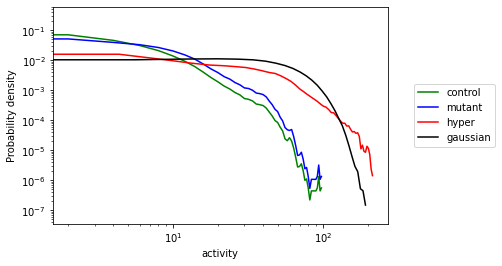

In [36]:

bin_num = 30
bin_min = -1

data = control_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
hist *= 1.0
bin_edge *= 1.0
plt.plot(bin_edge[:-1], hist, 'g', label='control')

data = mutant_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
hist *= 1.0
bin_edge *= 1.0
plt.plot(bin_edge[:-1], hist, 'b', label='mutant')

data = hyper_conca
hist, bin_edge = np.histogram(data, bins=50, density=True)
hist *= 1.0
bin_edge *= 1.0
plt.plot(bin_edge[:-1], hist, 'r', label='hyper')

data = surrogate * 5
hist, bin_edge = np.histogram(data, bins=50, density=True)
hist *= 1.0
plt.plot(bin_edge[:-1], hist, 'k', label='gaussian')

plt.yscale('log')
plt.xscale('log')
plt.xlabel('activity')
plt.ylabel('Probability density')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center')

0.9720075013949759

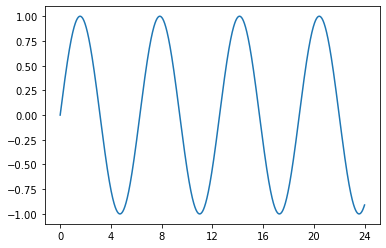

In [162]:
x = np.arange(2400)
x = x / 100
y = np.sin(x)

plt.plot(x, y)
ticks = np.arange(0, 24+0.01, 4)
plt.xticks(ticks)

idx = np.where(x == find_nearest(x, 14))
idx = idx[0][0]
rge = 5
find_local(y, idx-10, idx+10)[0]

In [92]:
idx_min = np.asarray().argmin()


TypeError: only integer scalar arrays can be converted to a scalar index

In [87]:
y[idx[0]-2:idx[0]+2]

TypeError: only integer scalar arrays can be converted to a scalar index

In [94]:
y[(idx[0]).astype(int):(idx[0]).astype(int)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [120]:
idx = np.where(x == find_nearest(x, 14))

In [124]:
idx = idx[0][0]

In [156]:
find_local(y, idx-2, idx+2)

[0.9876746787761803, 0.9919251751324931]

In [157]:
y[idx-2:idx+2]

array([0.98767468, 0.98919048, 0.99060736, 0.99192518])

In [166]:
data[np.where(x == find_local(y, find_nearest(x, 24) - 10, 
                                             find_nearest(x, 24) + 10)[1]  )]

TypeError: slice indices must be integers or None or have an __index__ method

In [176]:
idx = np.where(x == find_nearest(x, 24))[0][0]
data[np.where(y == find_local(y, idx - 10, idx + 10)[1] )]
find_local(y, idx - 10, idx + 10)[1]

IndexError: index 104 is out of bounds for axis 0 with size 96